In [1]:
import torch
import matplotlib.pyplot as plt
from models import g_step, MnistDGCCA
from dataset import get_mnist_dataset 
import numpy as np

train_set, train_classes = get_mnist_dataset(train=False, normalize=False)
train_views = list(train_set)

/scratch/sagar/Projects/learn/compressai/venv/lib/python3.6/site-packages/torch/nn/functional.py:3888: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/scratch/sagar/Projects/learn/compressai/venv/lib/python3.6/site-packages/torch/nn/functional.py:3826: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


## Federated DGCCA

/scratch/sagar/Projects/learn/compressai/venv/lib/python3.6/site-packages/torch/nn/functional.py:3888: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/scratch/sagar/Projects/learn/compressai/venv/lib/python3.6/site-packages/torch/nn/functional.py:3826: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


Text(0.5, 1.0, 't-SNE plot of latent representation G')

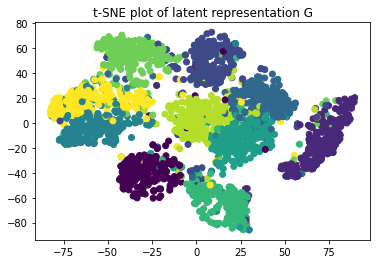

In [3]:
train_set, train_classes = get_mnist_dataset(train=False, normalize=False)

dgcca = torch.load('trained_models/dgcca_mnist_ae2_fed.model')

out = torch.stack(dgcca(train_views))
G = g_step(out.clone().detach())  

import numpy as np
from sklearn.manifold import TSNE

X = G[:10000].numpy()
X_embedded = TSNE(n_components=2).fit_transform(X)

fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:3000,0], X_embedded[:3000,1], c=train_classes[:3000].numpy())
axes.set_title('t-SNE plot of latent representation G')

Text(0.5, 1.0, 't-SNE plot of latent representation G')

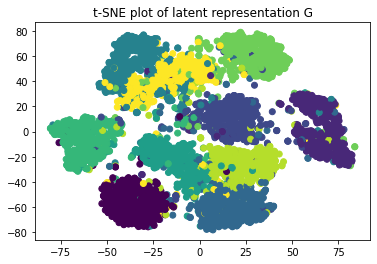

In [9]:

fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:6000,0], X_embedded[:6000,1], c=train_classes[:6000].numpy())
axes.set_title('t-SNE plot of latent representation G')

Text(0.5, 1.0, 't-SNE plot of latent representation G')

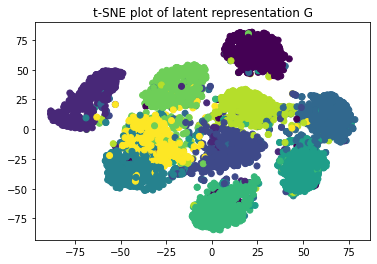

In [6]:
fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:6000,0], X_embedded[:6000,1], c=train_classes[:6000].numpy())
axes.set_title('t-SNE plot of latent representation G')

Text(0.5, 1.0, 't-SNE plot of latent representation G')

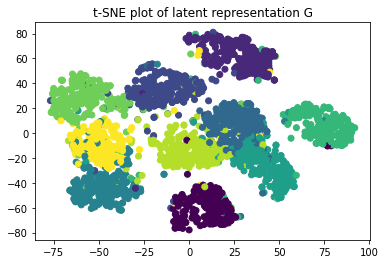

In [2]:
dgcca = torch.load('trained_models/dgcca_mnist_ae2_shuffled.model')

out = torch.stack(dgcca(train_views))
G = g_step(out.clone().detach())  

import numpy as np
from sklearn.manifold import TSNE

X = G[:10000].numpy()
X_embedded = TSNE(n_components=2).fit_transform(X)

fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:3000,0], X_embedded[:3000,1], c=train_classes[:3000].numpy())
axes.set_title('t-SNE plot of latent representation G')

Text(0.5, 1.0, 't-SNE plot of latent representation G of MNIST dataset')

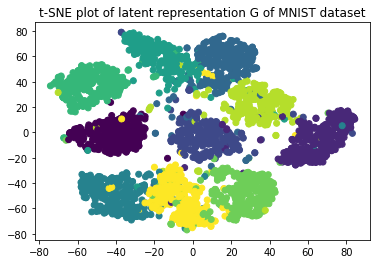

In [8]:
fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[3000:6000,0], X_embedded[3000:6000,1], c=train_classes[3000:6000].numpy())
axes.set_title('t-SNE plot of latent representation G of MNIST dataset')

In [8]:
fig.savefig('plt/MNISTae_tsne.pdf')

Text(0.5, 1.0, 't-SNE plot of latent representation G')

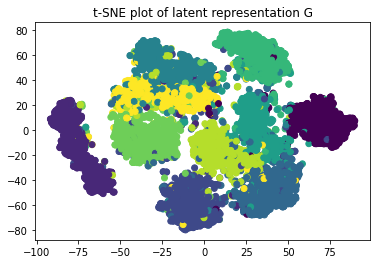

In [11]:
dgcca = torch.load('trained_models/dgcca_mnist_ae2.model')
out = torch.stack(dgcca(train_views))
G = g_step(out.clone().detach())  

import numpy as np
from sklearn.manifold import TSNE

# a = out[0].clone().detach()
X = G[:10000].numpy()
X_embedded = TSNE(n_components=2).fit_transform(X)

fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:10000,0], X_embedded[:10000,1], c=train_classes[:10000].numpy())
axes.set_title('t-SNE plot of latent representation G')

Text(0.5, 1.0, 't-SNE plot of latent representation G')

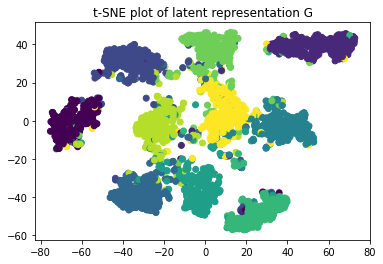

In [3]:
train_set = train_set.view(train_set.shape[0], train_set.shape[1], -1)

dgcca = torch.load('trained_models/dgcca_mnist_linearBN11_innerit1.model')
out = torch.stack(dgcca(train_views))
G = g_step(out.clone().detach())  

import numpy as np
from sklearn.manifold import TSNE

# a = out[0].clone().detach()
X = G[:3000].numpy()
X_embedded = TSNE(n_components=2).fit_transform(X)

fig, axes = plt.subplots(1,1)
axes.scatter(X_embedded[:3000,0], X_embedded[:3000,1], c=train_classes[:3000].numpy())
axes.set_title('t-SNE plot of latent representation G')

Text(0.5, 1.0, 't-SNE plot of latent representation G')

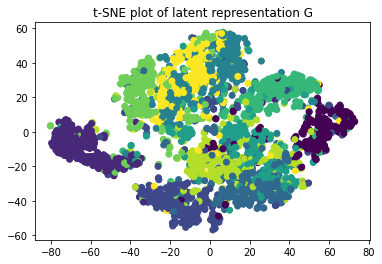

In [6]:
train_set = train_set.view(train_set.shape[0], train_set.shape[1], -1)

dgcca = torch.load('trained_models/dgcca_mnist_linearBN11_fed_innerit1.model')
out = torch.stack(dgcca(train_views))
G = g_step(out.clone().detach())  

import numpy as np
from sklearn.manifold import TSNE

# a = out[0].clone().detach()
X = G[:3000].numpy()
X_embedded = TSNE(n_components=2).fit_transform(X)

fig, axes = plt.subplots(1,1)
axes.scatter(X_embedded[:3000,0], X_embedded[:3000,1], c=train_classes[:3000].numpy())
axes.set_title('t-SNE plot of latent representation G')

Text(0.5, 1.0, 't-SNE plot of DGCCA with Fully connected autoencoder')

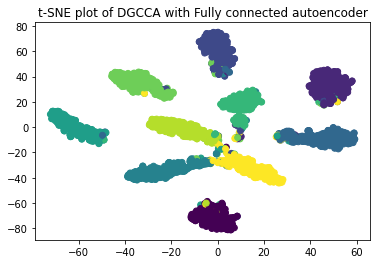

In [12]:
fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:3000,0], X_embedded[:3000,1], c=train_classes[:3000].numpy())
axes.set_title('t-SNE plot of DGCCA with Fully connected autoencoder')

In [13]:
fig.savefig('plt/july9_tsne_linear2.pdf')

Text(0.5, 1.0, 't-SNE plot of Federated DGCCA with Fully connected autoencoder')

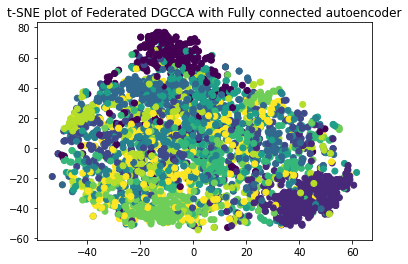

In [15]:
fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:3000,0], X_embedded[:3000,1], c=train_classes[:3000].numpy())
axes.set_title('t-SNE plot of Federated DGCCA with Fully connected autoencoder')


In [16]:
fig.savefig('plt/july9_tsne_fed_linear_bad.pdf')

Text(0.5, 1.0, 't-SNE plot of latent representation G')

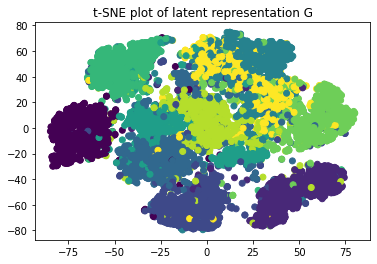

In [11]:
fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:10000,0], X_embedded[:10000,1], c=train_classes[:10000].numpy())
axes.set_title('t-SNE plot of latent representation G')

In [12]:
fig.savefig('plt/mnistae_fed_tsne.pdf')

## Plot Linear GCCA result for MNIST

Text(0.5, 1.0, 't-SNE plot of latent representation G')

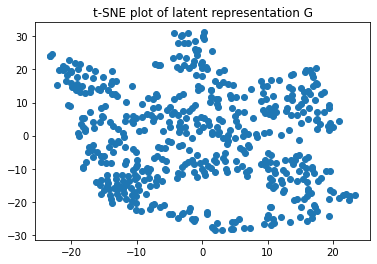

In [55]:
import scipy.io as sio
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# data = sio.loadmat('/scratch/sagar/Projects/federated_max_var_gcca/PAMI_sim/synthetic_large/data/results/mnist_gcca.mat')
data = sio.loadmat('/scratch/sagar/Projects/federated_max_var_gcca/PAMI_sim/synthetic_large/data/results/ehr_G1.mat')


G = data['G_3']

X = G
X_embedded = TSNE(n_components=2).fit_transform(X)

fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:,0], X_embedded[:,1])
axes.set_title('t-SNE plot of latent representation G')


ValueError: 'c' argument has 1000 elements, which is inconsistent with 'x' and 'y' with size 520.

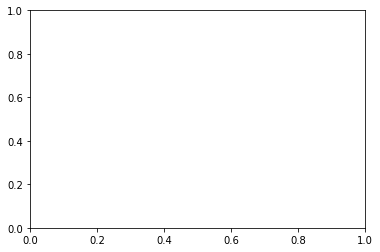

In [56]:
from prep_data import get_classes_list_from_dict
classes = get_classes_list_from_dict
fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:,0], X_embedded[:,1], c=classes)
axes.set_title('t-SNE plot of latent representation G')

In [3]:
from federated_max_var_gcca.ehr.prep_data import get_classes_list_from_dict
fname = '/scratch/sagar/Projects/federated_max_var_gcca/ehr/data/combined_views'
classes = get_classes_list_from_dict()

ModuleNotFoundError: No module named 'federated_max_var_gcca'

In [ ]:
istuple

In [49]:
import torch
mat, data = torch.load('/scratch/sagar/Projects/federated_max_var_gcca/ehr/data/view1_1000_500')

classes = []
cl_list = ((100, 139), 
           (140, 239), 
           (240, 289),
           (290, 319),
           (320, 389),
           (390, 459), 
           (460, 519),
           (520, 579),
           (580, 629),
           (630, 679),
           (680, 709),
           (710, 739),
           (740, 759),
           (760, 779),
           (780, 799),
           (800, 999))
           

keys = list(data.keys())
num_rows = data[keys[-1]][0]+1
num_cols = data[keys[-1]][1]+1
classes = [0]*num_rows
for i in range(num_rows):
    if keys[i*num_cols][0].startswith('0'):
        classes[i] = 1
    elif keys[i*num_cols][0].startswith('E'):
        classes[i] = 17
    elif keys[i*num_cols][0].startswith('V'):
        classes[i] = 18
    else:
        num = int(keys[i*num_cols][0][:3])
        for j in range(len(cl_list)):
            if num >= cl_list[j][0] and num <= cl_list[j][1]:
                classes[i] = j+1
    
        
        
        

In [51]:
classes[-1]

6

In [52]:
keys[-1]

('4019', '4019')

In [50]:
len(classes)

1000

In [45]:
999*num_rows

999000

In [22]:
cl_list[15]

(800, 999)

In [17]:

keys = list(data.keys())

int(keys[0][0][:3])

304

In [10]:
num()

NameError: name 'str2num' is not defined

In [7]:
len(cl_dict)

16

In [10]:
fig.savefig('plt/gcca_ehr_patient_vs_diagnosis_wrt_medication.pdf')

## PCA for mnist

In [19]:
import numpy as np
from sklearn.decomposition import PCA

X = train_set[0].view(60000,-1)
pca = PCA(n_components=10)
X_embed = pca.fit_transform(X)

Text(0.5, 1.0, 't-SNE plot of latent representation G')

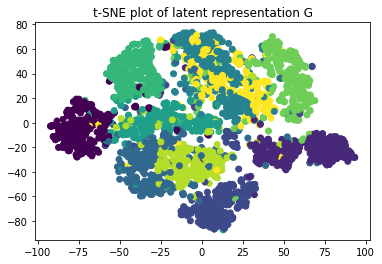

In [22]:
X_embedded = TSNE(n_components=2).fit_transform(X_embed[:10000,:])

fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:3000,0], X_embedded[:3000,1], c=train_classes[:3000].numpy())
axes.set_title('t-SNE plot of latent representation G')


In [14]:
X = train_set[0].view(60000,-1)